In [1]:
import cv2

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img=cv2.imread('images/Cars0.png')


In [15]:
def displayImg(img,*args):
    plt.imshow(img,*args)
    plt.show()

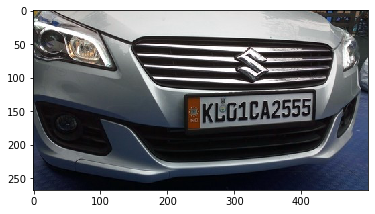

In [16]:
displayImg(img)

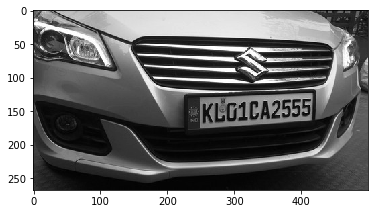

In [34]:
# single channel
# convert to gray image
grayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg,cmap='gray')
plt.show()
# displayImg(grayImg,cmap='gray')

grayImg=np.random.random([5,5])
print(grayImg)
sample=np.array([[1,0,1],
                 [0,1,0],
                ])
grayImg[np.where(sample)]

(array([0, 0, 1], dtype=int64), array([0, 2, 1], dtype=int64))

In [58]:
rows=grayImg.shape[0]
cols=grayImg.shape[1]

rows=30
cols=30

In [59]:
grayImg[0:3,0:3].shape

(3, 3)

In [60]:
Smax=24
T=60
G=3*Smax/4
R=np.zeros(grayImg.shape)
for row in range(rows):
    for col in range(cols):
        # template
        i=2
        center=grayImg[row][col]
        try:
            template=grayImg[row-i:row+i+1,col-i:col+i+1]
            # print(template[abs(template-center)>0.3])
            num=len(template[abs(template-center)>T])
            if num<G:
                R[row][col]=G-num
        except:
            print(row,col)
            pass

In [94]:
def Susan(img,T=50):

    Smax=24
    G=3*Smax/4
    R=np.zeros(grayImg.shape)
    for row in range(rows):
        for col in range(cols):
            # template
            i=2
            center=grayImg[row][col]
            try:
                template=grayImg[row-i:row+i+1,col-i:col+i+1]
                # print(template[abs(template-center)>0.3])
                num=len(template[abs(template-center)>T])
                if num<G:
                    R[row][col]=G-num
            except:
                print(row,col)
                pass
    return R

In [98]:
picNo=1
Rs=[]
for threshold in range(20,290,50):
    R=Susan(img,T=threshold)
    Rs.append(R)
#     plt.subplot(3,2,picNo)
#     picNo+=1
#     plt.imshow(R,cmap='gray')
#     plt.title('T='+str(threshold))
# plt.show()

<Figure size 432x288 with 0 Axes>

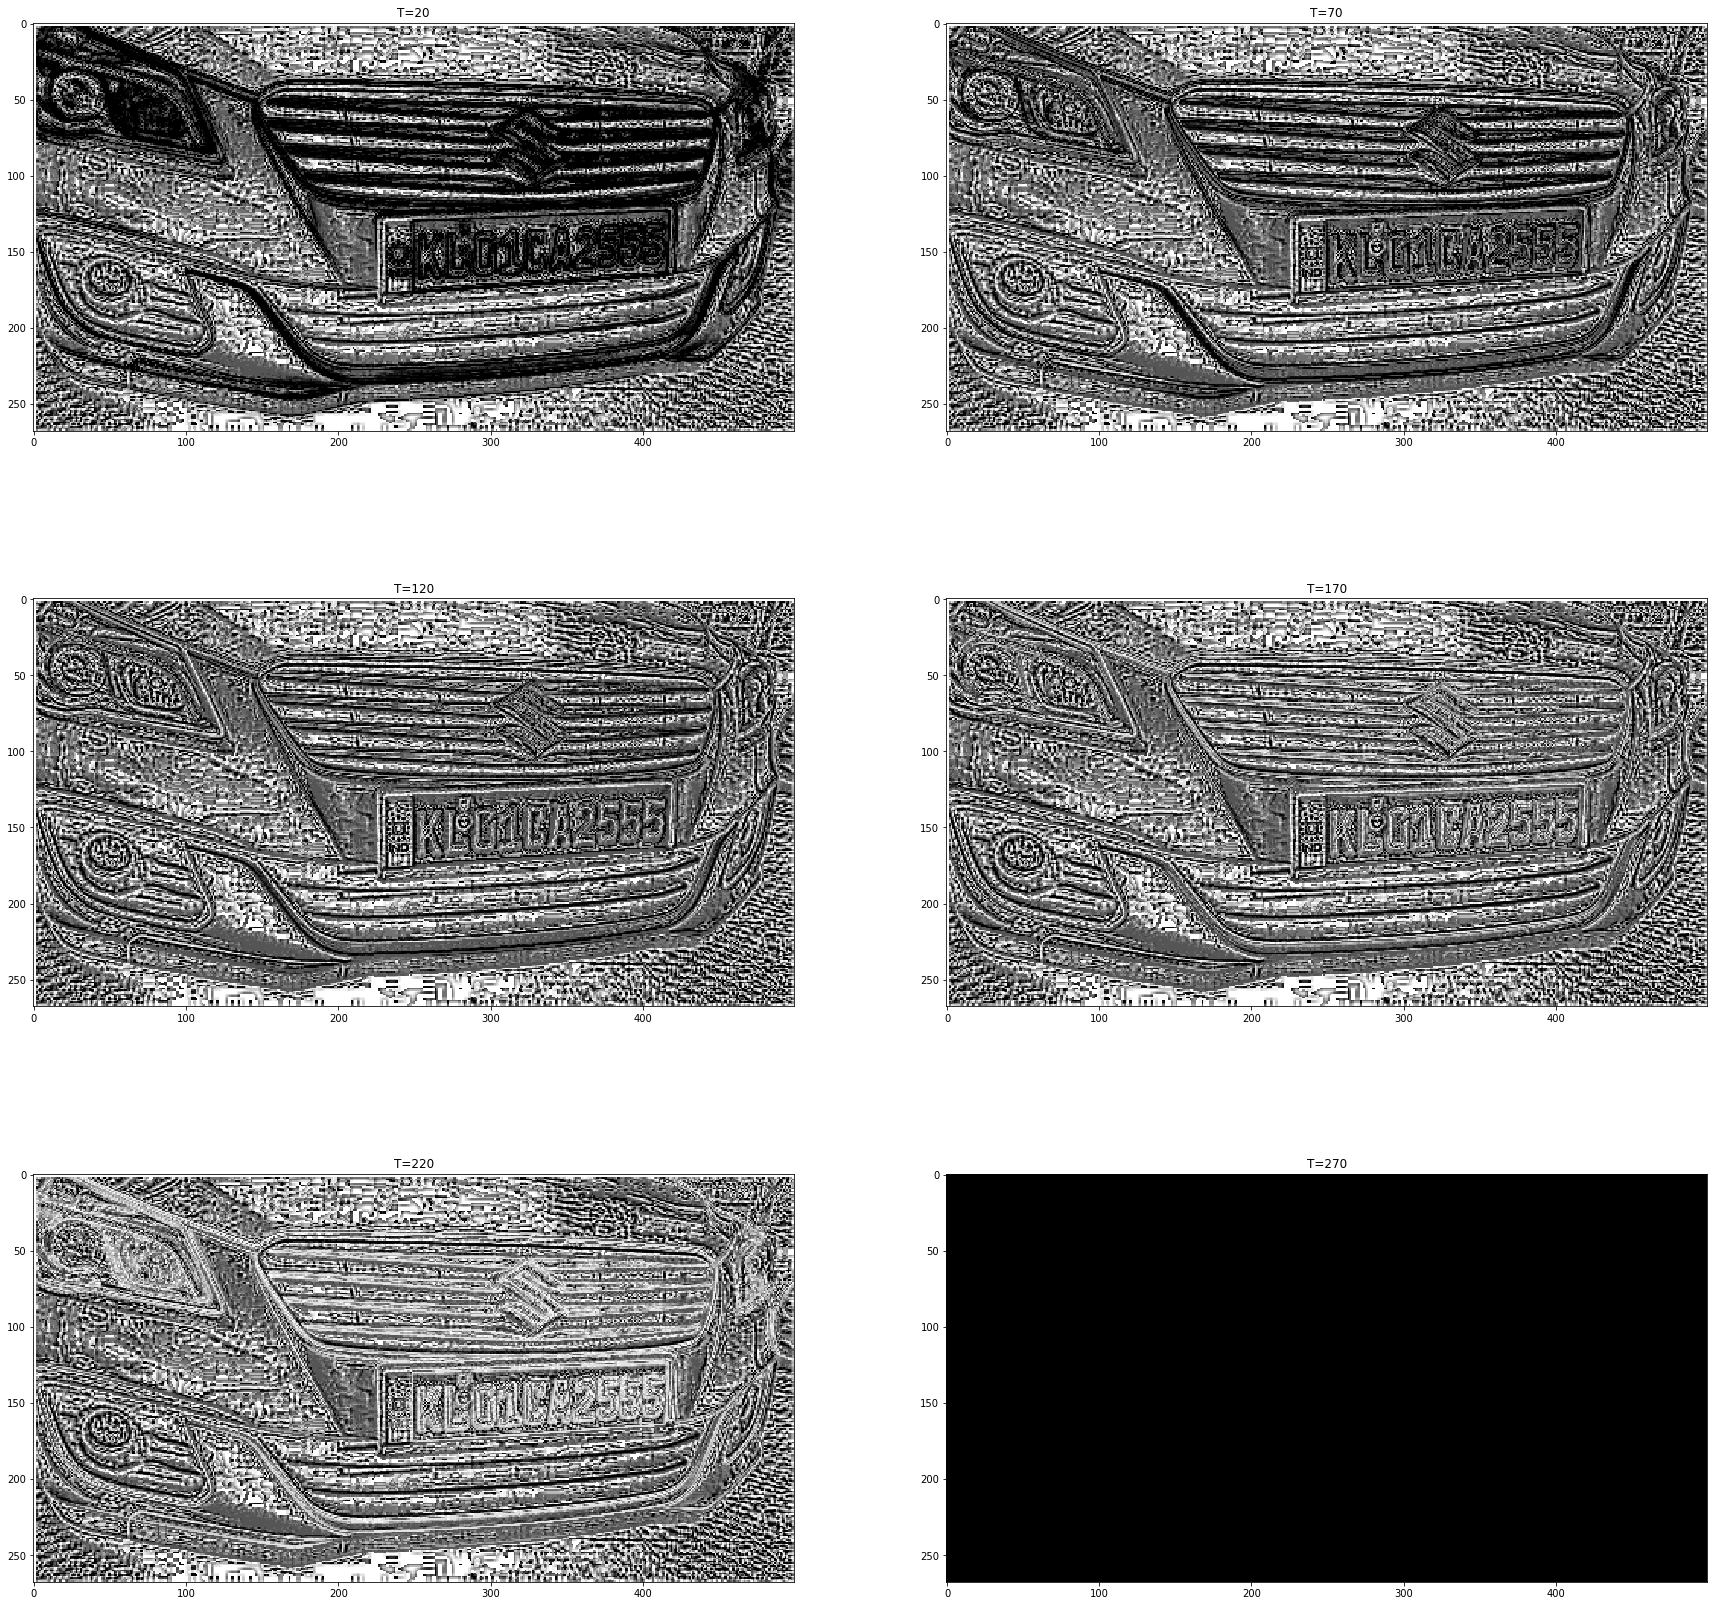

In [102]:

fig=plt.figure(figsize=(30,30))
thresholds=range(20,290,50)
for i in range(len(Rs)):
    plt.subplot(3,2,i+1)
    plt.imshow(Rs[i],cmap='gray')
    plt.title('T='+str(thresholds[i]))

plt.show()

R[:30][:4]

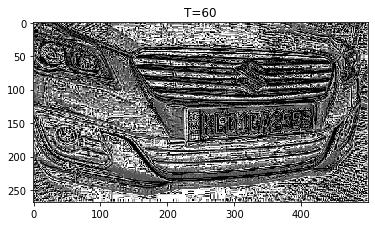

In [93]:
plt.imshow(R,cmap='gray')
plt.title('T='+str(T))
plt.show()

In [73]:
type(grayImg)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


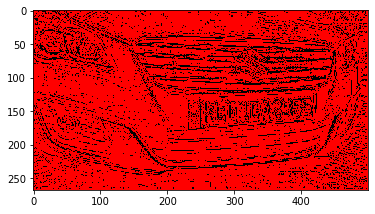

In [86]:
edgeImg = cv2.merge([R,np.zeros(R.shape),np.zeros(R.shape)])
displayImg(edgeImg)

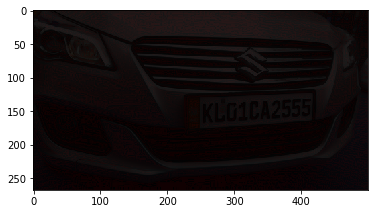

In [92]:
dst=np.zeros(R.shape)
dst = cv2.addWeighted( edgeImg ,0.9,img,0.1,0,dtype=cv2.CV_32S)
# cv2.imwrite('res2.jpg',dst)
displayImg(dst)

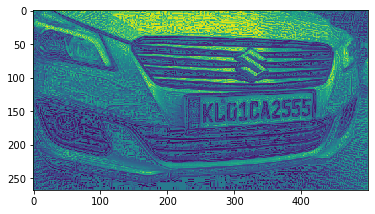

In [83]:
dst=np.zeros(R.shape)
dst = cv2.addWeighted( R ,0.9,grayImg,0.1,0,dtype=cv2.CV_32F)
cv2.imwrite('res2.jpg',dst)
displayImg(dst)